# Thực hành ví dụ đơn giản với Gradient Descent trong Python
Chúng ta viết phương pháp gradient descent cho hàm số $f(x) = x^2 + 5 \sin(x)$ có đạo hàm $f'(x) = 2x + 5 \cos(x)$. Hàm số này không dễ để tìm nghiệm của đạo hàm bằng $0$ nên ta mới sử dụng phương pháp giảm gradient. Giả sử bắt đầu tại một điểm $x_0$ nào đó, tại vòng lặp thứ $t$ chúng ta sẽ cập nhật: $$x_{t+1} = x_t - \eta (2x_t + 5 \cos(x_t))$$

### Import thư viện

In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt

### Viết các hàm số :
1. `grad` để tính đạo hàm
2. `cost` để tính giá trị của hàm số. Hàm này không sử dụng trong thuật toán nhưng thường được dùng để kiểm tra việc tính đạo hàm của đúng không hoặc để xem giá trị của hàm số có giảm theo mỗi vòng lặp hay không.
3. `myGD1` là phần chính thực hiện thuật toán Gradient Desent nêu phía trên. Đầu vào của hàm số này là learning rate và điểm bắt đầu. Thuật toán dừng lại khi đạo hàm có độ lớn đủ nhỏ.

In [2]:
def grad(x):
    """Tính đạo hàm của hàm số f(x) = x^2 + 5 * sin(x)"""
    return 2 * x + 5 * np.cos(x)

def cost(x):
    """Tính giá trị của hàm số f(x) = x^2 + 5 * sin(x)"""
    return x**2 + 5 * np.sin(x)

def myGD1(eta, x0):
    """Thực hiện thuật toán Gradient Descent"""
    x = [x0]
    for it in range(1000):  # Giới hạn vòng lặp để tránh vô hạn
        x_new = x[-1] - eta * grad(x[-1])
        if abs(grad(x_new)) < 1e-3:  # Dừng khi đạo hàm đủ nhỏ
            break
        x.append(x_new)
    return (x, it)

### Sử dụng các điểm khởi tạo khác nhau $x_0 = -5$ và $x_0 = 5$

In [3]:
(x1, it1) = myGD1(0.1, -5)
(x2, it2) = myGD1(0.1, 5)

print(f"Vòng lặp với x0 = -5: {it1} vòng lặp, nghiệm gần nhất: {x1[-1]}")
print(f"Vòng lặp với x0 = 5: {it2} vòng lặp, nghiệm gần nhất: {x2[-1]}")    



Vòng lặp với x0 = -5: 11 vòng lặp, nghiệm gần nhất: -1.1106667365268623
Vòng lặp với x0 = 5: 29 vòng lặp, nghiệm gần nhất: -1.1103410483948122


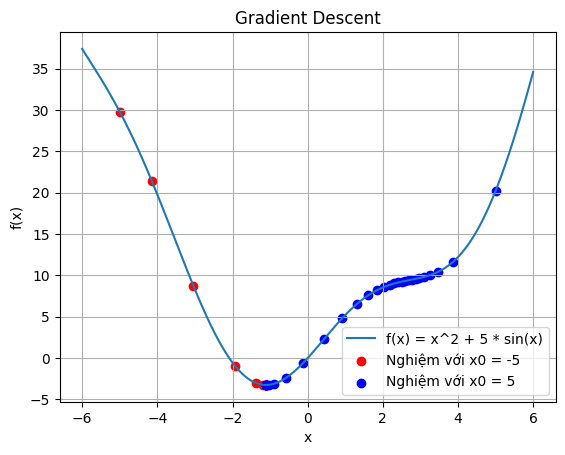

In [5]:
# Vẽ đồ thị hàm số và các điểm tìm được
x = np.linspace(-6, 6, 400)
y = cost(x)
plt.plot(x, y, label='f(x) = x^2 + 5 * sin(x)')
plt.scatter(x1, cost(np.array(x1)), color='red', label='Nghiệm với x0 = -5')
plt.scatter(x2, cost(np.array(x2)), color='blue', label='Nghiệm với x0 = 5')
plt.title('Gradient Descent')   
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()